In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00


# What is NLP

Giving computers the ability to understand text and spoken words in much the same way human beings can. Enable computers to process human language in the form of text or voice data and to ‘understand’ its full meaning, complete with the speaker or writer’s intent and sentiment.

## Examples of NLP

- Text Classification is used when we need to classify text fragment into one of several pre-defined classes. Examples include e-mail spam detection, news categorization, assigning support request to one of the categories, and more.

- Sentiment Analysis is a regression task, where we want to understand the degree of negativity of given piece of text. We may want to label texts in a dataset from the most negative (-1) to most positive ones (+1), and train a model that will output a number of "positiveness" of a text.

- Named Entity Recognition (NER) is a task of extracting some entities from text, such as dates, addresses, people names, etc. Together with intent classification, NER is often used in dialog systems to extract parameters from user's utterance.

- Text generation involves generating text. Using infomation, either words, images, or audio, to generate text. Examples are QnA and text summarisation.

Firstly, we show how text are converted to numbers/tensors so that we can input them into neural networks


In [ ]:
import torch
import os
import torchtext
import collections
from datasets import load_dataset

# Load AG News dataset
dataset = load_dataset("ag_news")

# Splitting the dataset into train and test
train_dataset = dataset['train'].shuffle()
test_dataset = dataset['test'].shuffle()

# This dataset has the following classes
classes = ['World', 'Sports', 'Business', 'Sci/Tech']



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
# Access the first element of the train dataset
train_dataset = train_dataset.shuffle()
first_element = train_dataset[0:3]
print(first_element)

{'text': ['AT amp;T unveis the Ogo, a dedicate messaging device Ogo is the first wireless messaging device to provide instant messaging (IM) and e-mail from all three leading providers - AOL, MSN, and Yahoo!', 'Syrian Troop Redeployment Said Meaningless Israeli Prime Minister Ariel Sharon reacted skeptically on Wednesday to a redeployment of Syrian troops in Lebanon, saying that the move did not mean any real change in Syrian policy.', 'Realtors Wield Power of Intimidating Views In Washington and in the state capitals, interest groups have long chosen to ring government buildings with their own offices as a display of their clout and determination.'], 'label': [3, 0, 2]}


In [ ]:
for i,x in zip(range(10),train_dataset):
    print(f"**{classes[x['label']]}** -> {x['text']}")

**Sci/Tech** -> AT amp;T unveis the Ogo, a dedicate messaging device Ogo is the first wireless messaging device to provide instant messaging (IM) and e-mail from all three leading providers - AOL, MSN, and Yahoo!
**World** -> Syrian Troop Redeployment Said Meaningless Israeli Prime Minister Ariel Sharon reacted skeptically on Wednesday to a redeployment of Syrian troops in Lebanon, saying that the move did not mean any real change in Syrian policy.
**Business** -> Realtors Wield Power of Intimidating Views In Washington and in the state capitals, interest groups have long chosen to ring government buildings with their own offices as a display of their clout and determination.
**World** -> Nobel to first African woman WHEN Wangari Maathai got word she had won the Nobel Peace Prize, she was busy with the work that earned her the prestigious award - campaigning to protect Kenya #39;s forests and distributing food to hungry constituents suffering from drought.
**Business** -> Disney to  #3

# Creating a vocabulary
A vocab is a list of words that exist in our dataset and give each of them a number(their index), this way we're representing each word by their index


In [ ]:
# First we split up a sentence into words, or tokens

tokenizer = torchtext.data.utils.get_tokenizer('basic_english')
tokenizer('He said: hello' )

['he', 'said', 'hello']

Tokenizer splits sentences into tokens, but 1 token might not mean 1 word. For example if the model sees a word that it has never seen before, like a typo or complex words

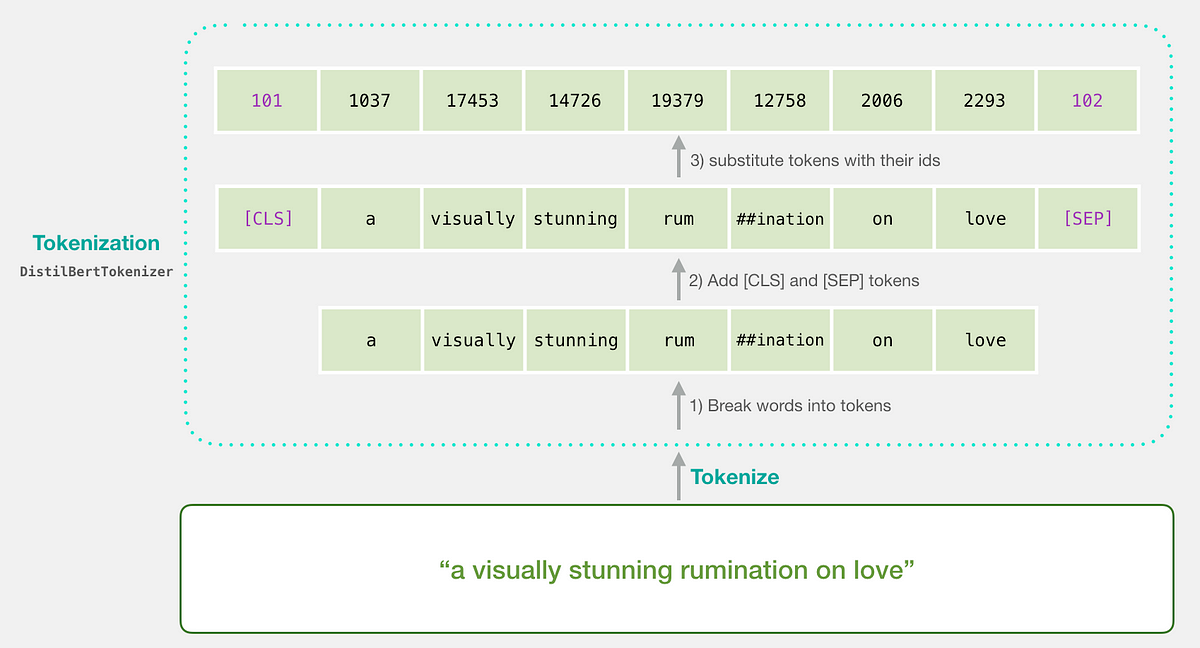

In [ ]:
counter = collections.Counter()

for x in train_dataset:
    counter.update(tokenizer(x['text']))

vocab = torchtext.vocab.vocab(counter, min_freq=1)

# Counter will look somehting like: Counter({'.': 225971, 'the': 203843, ',': 165685, 'to': 119205, 'a': 110153, 'of': 97909 ....)
# basically it counts the occurences of each word. The reason why we do this is that our vocab doesnt need to include all of the words
# that appear in the dataset, because there are likely typos or rare words that are uneccesary. If we included every unique word our vocab
# will be humongous

In [ ]:
num_words_to_print = 10  # Change this number to print more or fewer words
for i, word in enumerate(vocab.get_itos()):
    print(word)
    if i >= num_words_to_print - 1:
        break

at
amp
t
unveis
the
ogo
,
a
dedicate
messaging


In [ ]:
vocab_size = len(vocab)
print(f"Vocab size of {vocab_size}")

stoi = vocab.get_stoi()
# dict of word:index

# Encoding function: Convert text to a list of indices. Since we have an array of words being represented by their index,
# it can be difficult to quickly change a number back into the word they represent as we need to search thru the array.
# Thus it is simpler to have a dictionary of word:index
def encode(text):
    return [stoi.get(s, -1) for s in tokenizer(text)]  # -1 for unknown words

#stoi.get(s, -1) is the same as stoi[s], which gets the index of a word in vocab except it returns -1 if word not found

encode('I love to play with the words')

Vocab size of 95810


[879, 989, 14, 682, 77, 4, 893]

# BOW (Bag-of-word) representation

For example, given a simple vocabulary {'hello': 0, 'world': 1, 'i': 2, 'love': 3}, the sentence "I love hello world" would be tokenized to ['i', 'love', 'hello', 'world']. In the BoW model, this might be represented as [1, 1, 1, 1], indicating that each word in the vocabulary appears once in the sentence.

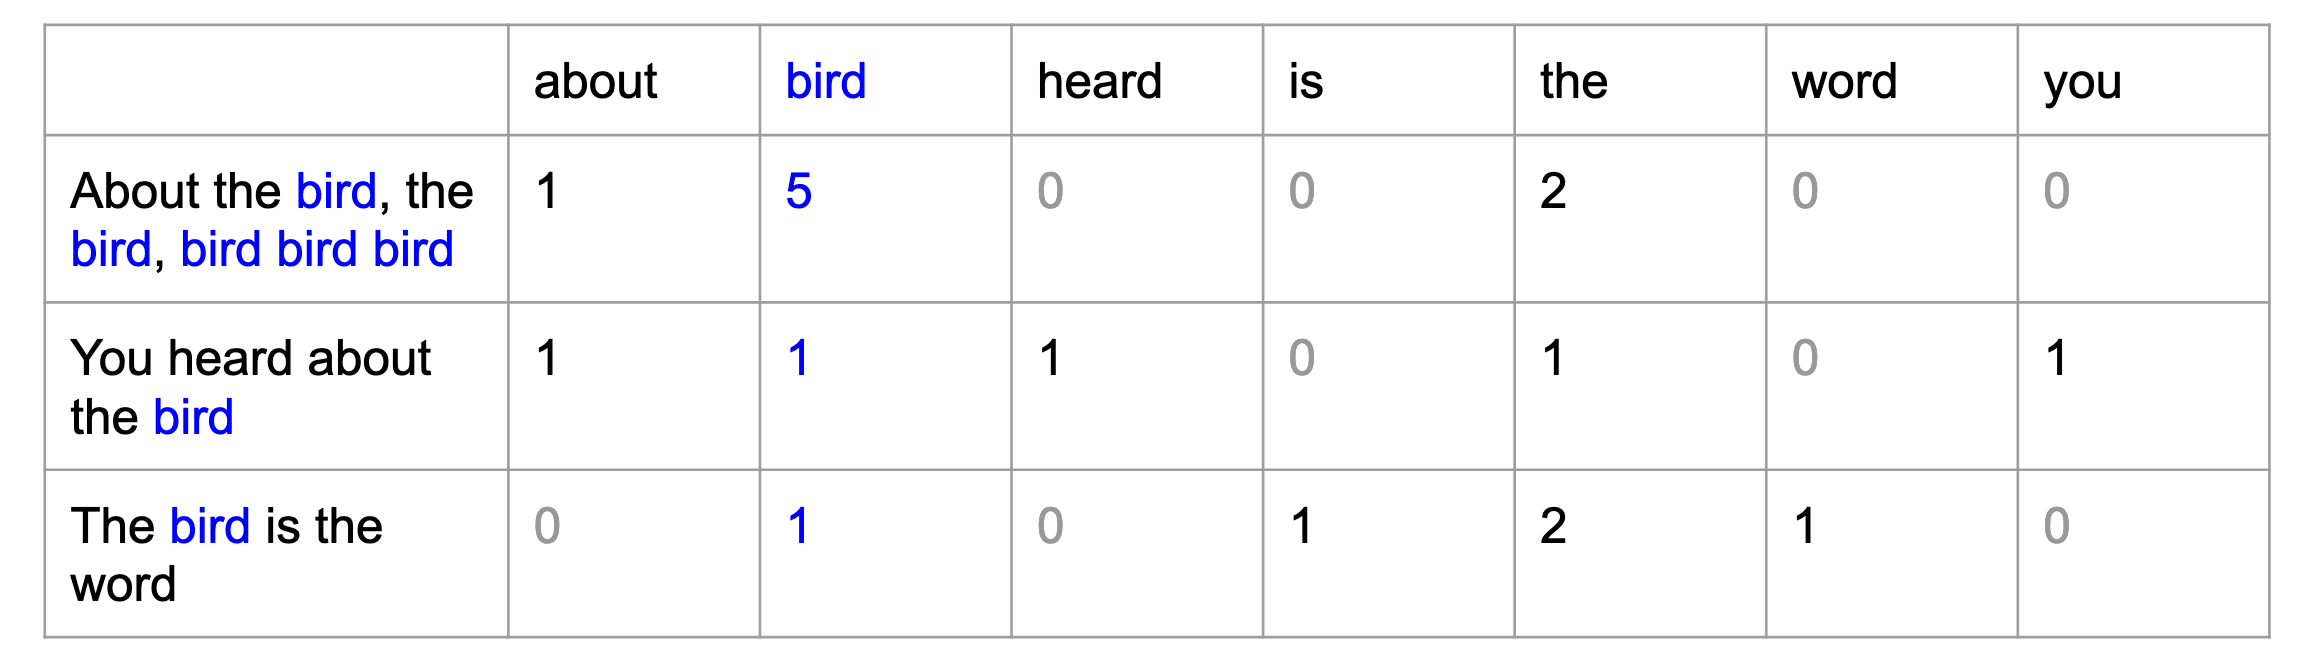

In [ ]:
# Assuming vocab and tokenizer are already defined
vocab_size = 20000
print(f"Vocab size: {vocab_size}")

stoi = vocab.get_stoi()  # dict of word:index

# Tokenizer function (example, replace with your tokenizer)
def tokenizer(text):
    return text.lower().split()


# Convert text to Bag-of-Words (BoW) representation
def to_bow(text, bow_vocab_size=vocab_size):
    #create a array of zeros
    res = torch.zeros(bow_vocab_size, dtype=torch.float32)
    for i in encode(text):
        #increase count of encountered words by one
        if 0 <= i < bow_vocab_size:
            res[i] += 1
    return res

# Test the function with a sample text
sample_text = 'I love to play with the words'
sample_bow = to_bow(sample_text)
print(sample_bow, len(sample_bow))
# notice how this is a vocab length sized array.


Vocab size: 20000
tensor([0., 0., 0.,  ..., 0., 0., 0.]) 20000


In [ ]:
from torch.utils.data import DataLoader
import numpy as np


train_loader = DataLoader(train_dataset, shuffle=True)
test_loader = DataLoader(test_dataset,  shuffle=True)

# Training loop

Now we will try training a simple classifier using only BOW. We are basically sorting words into their classes using the number of times certain words appear in the text. For example, a larger number of words such as "phone", "computers" mean the news is likely tech related.

In [ ]:
# Our model will be a single layer that turns a tensor of size vocab_length to 4(the number of classes).
# The model will output the probabilites that the input is from each class.

net = torch.nn.Sequential(
    torch.nn.Linear(vocab_size,4),
    torch.nn.LogSoftmax()
    )


def train_epoch(net, dataloader, lr=0.01, optimizer=None, loss_fn=torch.nn.NLLLoss(), epoch_size=None, report_freq=200):
    optimizer = optimizer or torch.optim.Adam(net.parameters(), lr=lr)
    net.train()
    total_loss, acc, count = 0, 0, 0

    for batch in dataloader:
        texts = batch['text']
        labels = batch['label'].long()

        features = torch.stack([to_bow(text) for text in texts]).float()

        optimizer.zero_grad()
        out = net(features)

        loss = loss_fn(out, labels)
        loss.backward()
        optimizer.step()

        # The code above is the simple training loop you should have seen in previous workshops
        # The code below is used to calculate accuracy rate/loss

        total_loss += loss.item()
        _, predicted = torch.max(out, 1)
        acc += (predicted == labels).sum().item()
        count += labels.size(0)

        if (count // dataloader.batch_size) % report_freq == 0:
            print(f"{count}: acc={acc / count}")

        if epoch_size and count >= epoch_size:
            break

    return total_loss / count, acc / count

# Example usage
train_epoch(net, train_loader, epoch_size=15000)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


200: acc=0.5
400: acc=0.6025
600: acc=0.6416666666666667
800: acc=0.675
1000: acc=0.696
1200: acc=0.7166666666666667
1400: acc=0.73
1600: acc=0.74
1800: acc=0.7522222222222222
2000: acc=0.7605
2200: acc=0.7622727272727273
2400: acc=0.76875
2600: acc=0.7703846153846153
2800: acc=0.7742857142857142
3000: acc=0.7753333333333333
3200: acc=0.7775
3400: acc=0.7817647058823529
3600: acc=0.7847222222222222
3800: acc=0.7863157894736842
4000: acc=0.78925
4200: acc=0.79
4400: acc=0.7927272727272727
4600: acc=0.7954347826086956
4800: acc=0.7991666666666667
5000: acc=0.7998
5200: acc=0.8001923076923076
5400: acc=0.8014814814814815
5600: acc=0.8023214285714285
5800: acc=0.8031034482758621
6000: acc=0.8043333333333333
6200: acc=0.8051612903225807
6400: acc=0.80765625
6600: acc=0.8086363636363636
6800: acc=0.8088235294117647
7000: acc=0.81
7200: acc=0.8109722222222222
7400: acc=0.8118918918918919
7600: acc=0.8131578947368421
7800: acc=0.8147435897435897
8000: acc=0.815875
8200: acc=0.8174390243902439


(0.6424071233362013, 0.8332666666666667)

# Interpreting results

The accuracy of your model should be about 0.8 you can try modifying the model to be larger, or its LR and see how that affects the accuracy.
Try out different sentences below to see how your model classifies certain words

In [ ]:
torch.exp(net(to_bow("soccer football rugby swimming"))).tolist()
# we need to use exponent as our model has a log softmax layer

[1.604767567187082e-05,
 0.9997163414955139,
 0.00015307433204725385,
 0.00011455218918854371]

# Exercise

Turn the output of your model to plain english, eg. the sentence is most likely to be a ___ article.

# Embeddings

Problem of BOW is that word order is not established.

The idea of embedding is to represent words by lower-dimensional dense vectors, which somehow reflect semantic meaning of a word. In simpler terms, instead of representing words with numbers as we did earlier, we represent them as vectors, which contain infomation on the word's meaning.

The main way to train a embedding layer is word2vec, which consists of 2 main architectures.

- Continuous bag-of-words (CBoW) — in this architecture, we train the model to predict a word from surrounding context. Given a sample W-2 to W2, the model tries to predict a W0 from W-2, W-1, W1 and W2. Words which are semantically similar should influence these probabilities in similar ways, because semantically similar words should be used in similar contexts.

- Continuous skip-gram is opposite to CBoW. The model uses W0 to predict W-2, W-1, W1 and W2

We won't be training a new embedding layer, as trained layers exist and there is no need to train a new layer since the meaning of english words are unlikely to change drastically.

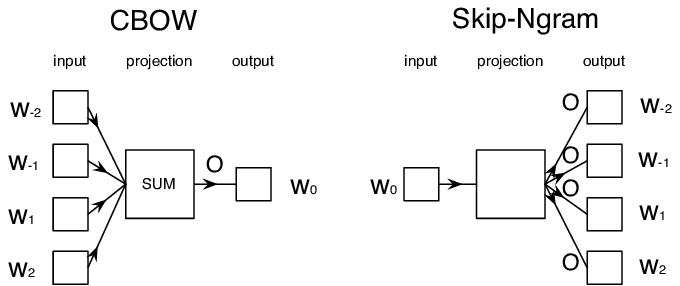

In [ ]:
import gensim.downloader as api
w2v = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
for w,p in w2v.most_similar('neural'):
    print(f"{w} -> {p}")

neuronal -> 0.780479907989502
neurons -> 0.7326499223709106
neural_circuits -> 0.7252850532531738
neuron -> 0.7174385190010071
cortical -> 0.6941086649894714
brain_circuitry -> 0.6923245787620544
synaptic -> 0.6699119210243225
neural_circuitry -> 0.6638563275337219
neurochemical -> 0.6555314660072327
neuronal_activity -> 0.6531826853752136


In [ ]:
w2v.most_similar(positive=['Queen','man'],negative=['woman'])[0]

('King', 0.5451929569244385)

In [ ]:
w2v["queen"]

array([ 0.00524902, -0.14355469, -0.06933594,  0.12353516,  0.13183594,
       -0.08886719, -0.07128906, -0.21679688, -0.19726562,  0.05566406,
       -0.07568359, -0.38085938,  0.10400391, -0.00081635,  0.1328125 ,
        0.11279297,  0.07275391, -0.046875  ,  0.06591797,  0.09423828,
        0.19042969,  0.13671875, -0.23632812, -0.11865234,  0.06542969,
       -0.05322266, -0.30859375,  0.09179688,  0.18847656, -0.16699219,
       -0.15625   , -0.13085938, -0.08251953,  0.21289062, -0.35546875,
       -0.13183594,  0.09619141,  0.26367188, -0.09472656,  0.18359375,
        0.10693359, -0.41601562,  0.26953125, -0.02770996,  0.17578125,
       -0.11279297, -0.00411987,  0.14550781,  0.15625   ,  0.26757812,
       -0.01794434,  0.09863281,  0.05297852, -0.03125   , -0.16308594,
       -0.05810547, -0.34375   , -0.17285156,  0.11425781, -0.09033203,
        0.13476562,  0.27929688, -0.04980469,  0.12988281,  0.17578125,
       -0.22167969, -0.01190186,  0.140625  , -0.18164062,  0.11

# Contextual Embeddings
One key limitation of traditional pretrained embedding representations such as Word2Vec is the problem of word sense disambiguation. While pretrained embeddings can capture some of the meaning of words in context, every possible meaning of a word is encoded into the same embedding. This can cause problems in downstream models, since many words such as the word 'play' have different meanings depending on the context they are used in.

For example word 'play' in those two different sentences have quite different meaning:

- I went to a play at the theature.
- John wants to play with his friends.

# PART 2, RESET YOUR RUNTIME, ensure is a GPU session

Previously we learnt about word2vec which represent words as embeddings which contain the words' meanings.

But this alone is unable to model word ordering, only meaning of single words.

To capture the meaning of text sequence, recurrent neural networks, or RNNs where made. In RNN, we pass our sentence through the network one word at a time, and the network produces some state, which we then pass to the network again with the next symbol.

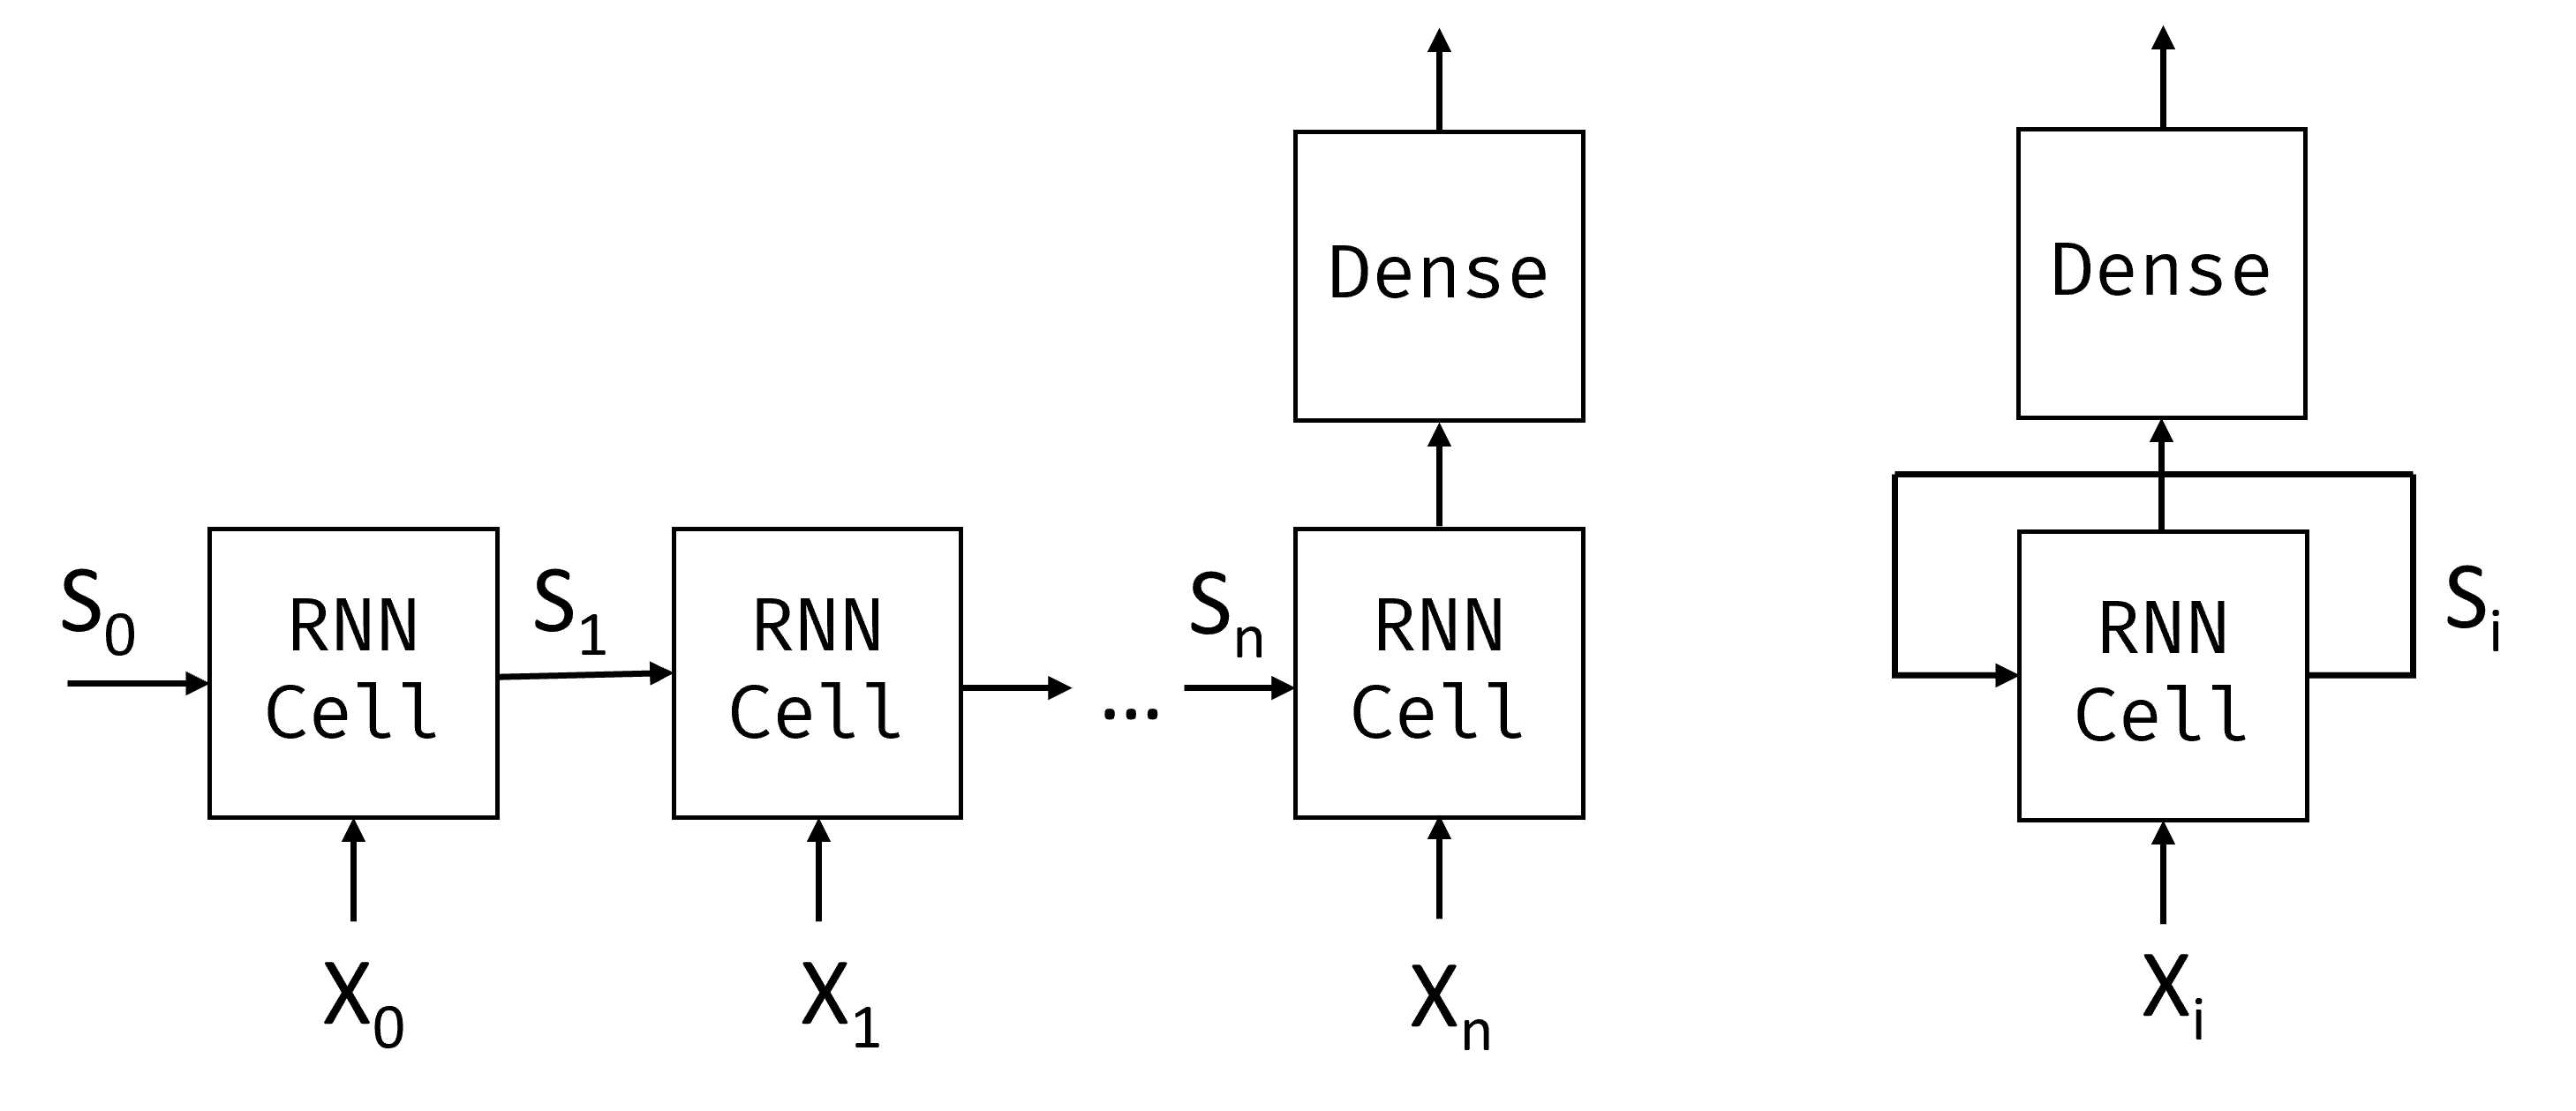

In [ ]:
!pip install portalocker>=2.0.0

import collections
import builtins
import torch
import torchtext
import collections
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vocab = None
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')

In [ ]:
train_dataset, test_dataset = torchtext.datasets.AG_NEWS(root='./data')

train_dataset = list(train_dataset)
test_dataset = list(test_dataset)
classes = ['World', 'Sports', 'Business', 'Sci/Tech']
print('Building vocab...')
counter = collections.Counter()
for (label, line) in train_dataset:
    counter.update(torchtext.data.utils.ngrams_iterator(tokenizer(line),ngrams=1))
vocab = torchtext.vocab.vocab(counter, min_freq=1)
vocab_size = len(vocab)

Building vocab...


In [ ]:
class RNNClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_class):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embedding = torch.nn.Embedding(vocab_size, embed_dim)
        self.rnn = torch.nn.RNN(embed_dim,hidden_dim,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, num_class)

    def forward(self, x):
        batch_size = x.size(0)
        x = self.embedding(x)
        x, _ = self.rnn(x)
        return self.fc(x.mean(dim=1))

In [ ]:
def load_dataset(ngrams=1,min_freq=1):
    print("Loading dataset...")
    train_dataset, test_dataset = torchtext.datasets.AG_NEWS(root='./data')
    train_dataset = list(train_dataset)
    test_dataset = list(test_dataset)
    classes = ['World', 'Sports', 'Business', 'Sci/Tech']
    print('Building vocab...')
    counter = collections.Counter()
    for (label, line) in train_dataset:
        counter.update(torchtext.data.utils.ngrams_iterator(tokenizer(line),ngrams=ngrams))
    vocab = torchtext.vocab.vocab(counter, min_freq=min_freq)
    return train_dataset,test_dataset,classes,vocab

stoi_hash = {}

In [ ]:
def encode(x,voc=None,unk=0,tokenizer=tokenizer):
    v = vocab if voc is None else voc
    if v in stoi_hash.keys():
        stoi = stoi_hash[v]
    else:
        stoi = v.get_stoi()
        stoi_hash[v]=stoi
    return [stoi.get(s,unk) for s in tokenizer(x)]

def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = torch.nn.CrossEntropyLoss(),epoch_size=None, report_freq=200):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    loss_fn = loss_fn.to(device)
    net.train()
    total_loss,acc,count,i = 0,0,0,0
    for labels,features in dataloader:
        optimizer.zero_grad()
        features, labels = features.to(device), labels.to(device)
        out = net(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
        i+=1
        if i%report_freq==0:
            print(f"{count}: acc={acc.item()/count}")
        if epoch_size and count>epoch_size:
            break
    return total_loss.item()/count, acc.item()/count


In [ ]:

def padify(b,voc=None,tokenizer=tokenizer):
    # b is the list of tuples of length batch_size
    #   - first element of a tuple = label,
    #   - second = feature (text sequence)
    # build vectorized sequence
    v = [encode(x[1],voc=voc,tokenizer=tokenizer) for x in b]
    # compute max length of a sequence in this minibatch
    l = max(map(len,v))
    return ( # tuple of two tensors - labels and features
        torch.LongTensor([t[0]-1 for t in b]),
        torch.stack([torch.nn.functional.pad(torch.tensor(t),(0,l-len(t)),mode='constant',value=0) for t in v])
    )

def offsetify(b,voc=None):
    # first, compute data tensor from all sequences
    x = [torch.tensor(encode(t[1],voc=voc)) for t in b]
    # now, compute the offsets by accumulating the tensor of sequence lengths
    o = [0] + [len(t) for t in x]
    o = torch.tensor(o[:-1]).cumsum(dim=0)
    return (
        torch.LongTensor([t[0]-1 for t in b]), # labels
        torch.cat(x), # text
        o
    )

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, collate_fn=padify, shuffle=True)
net = RNNClassifier(vocab_size,64,32,len(classes)).to(device)
train_epoch(net,train_loader, lr=0.001)

3200: acc=0.318125
6400: acc=0.3825
9600: acc=0.4403125
12800: acc=0.484453125
16000: acc=0.52075
19200: acc=0.54859375
22400: acc=0.5745535714285714
25600: acc=0.596171875
28800: acc=0.6145833333333334
32000: acc=0.63234375
35200: acc=0.6462215909090909
38400: acc=0.6593229166666666
41600: acc=0.6720192307692308
44800: acc=0.6828348214285714


KeyboardInterrupt: 

# Long Short Term Memory (LSTM)
One of the main problems of classical RNNs is so-called vanishing gradients problem. Because RNNs are trained end-to-end in one back-propagation pass, it is having hard times propagating error to the first layers of the network, and thus the network cannot learn relationships between distant tokens.

Put simply, RNNs remember everything, but because of this, unnecceary info is kept during the backpropagation, and restricts the amount of infomation will reach earlier tokens

One of the ways to avoid this problem is to introduce explicit state management by using so called gates. There are two most known architectures of this kind: Long Short Term Memory (LSTM) and Gated Relay Unit (GRU).





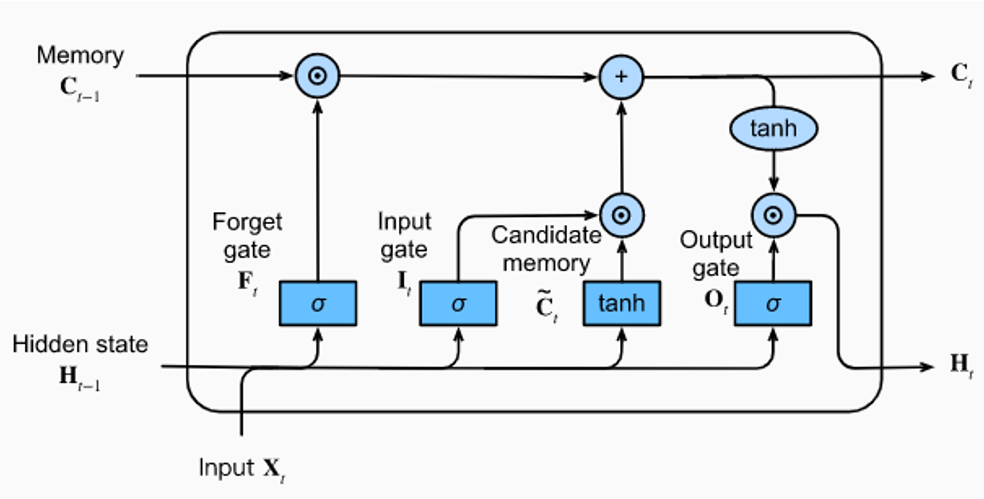

In [ ]:
class LSTMGenerator(torch.nn.Module):
    def __init__(self, vocab_size, hidden_dim):
        super().__init__()
        self.rnn = torch.nn.LSTM(vocab_size,hidden_dim,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, s=None):
        x = torch.nn.functional.one_hot(x,vocab_size).to(torch.float32)
        x,s = self.rnn(x,s)
        return self.fc(x),s

In [ ]:
def generate(net,size=100,start='today '):
        chars = list(start)
        out, s = net(encode(chars).view(1,-1).to(device))
        for i in range(size):
            nc = torch.argmax(out[0][-1])
            chars.append(vocab.get_itos()[nc])
            out, s = net(nc.view(1,-1),s)
        return ''.join(chars)

In [ ]:
def enc(x):
    return torch.LongTensor(encode(x,voc=vocab,tokenizer=char_tokenizer))

nchars = 100
def get_batch(s,nchars=nchars):
    ins = torch.zeros(len(s)-nchars,nchars,dtype=torch.long,device=device)
    outs = torch.zeros(len(s)-nchars,nchars,dtype=torch.long,device=device)
    for i in range(len(s)-nchars):
        ins[i] = enc(s[i:i+nchars])
        outs[i] = enc(s[i+1:i+nchars+1])
    return ins,outs

get_batch(train_dataset[0][1])

TypeError: can't assign a list to a torch.cuda.LongTensor

In [ ]:
net = LSTMGenerator(vocab_size,64).to(device)

samples_to_train = 10000
optimizer = torch.optim.Adam(net.parameters(),0.01)
loss_fn = torch.nn.CrossEntropyLoss()
net.train()
for i,x in enumerate(train_dataset):
    # x[0] is class label, x[1] is text
    if len(x[1])-nchars<10:
        continue
    samples_to_train-=1
    if not samples_to_train: break
    text_in, text_out = get_batch(x[1])
    optimizer.zero_grad()
    out,s = net(text_in)
    loss = torch.nn.functional.cross_entropy(out.view(-1,vocab_size),text_out.flatten()) #cross_entropy(out,labels)
    loss.backward()
    optimizer.step()
    if i%1000==0:
        print(f"Current loss = {loss.item()}")
        print(generate(net))

NameError: name 'get_batch' is not defined